In [1]:
#dataset: https://www.kaggle.com/c/titanic/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, accuracy_score

In [2]:
df = pd.read_csv('./datasets/titanic/train.csv', index_col=0)

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Chapman, Mr. Charles Henry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


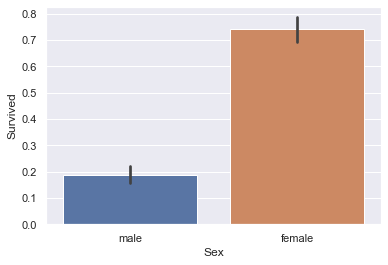

In [5]:
sns.barplot(x="Sex", y="Survived", data=df)

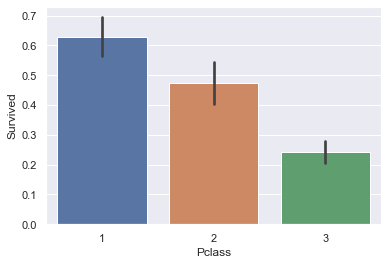

In [6]:
sns.barplot(x="Pclass", y="Survived", data=df)

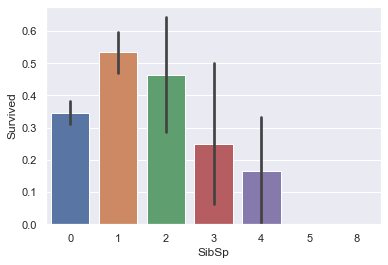

In [7]:
sns.barplot(x="SibSp", y="Survived", data=df)

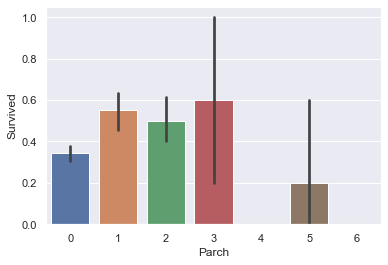

In [8]:
sns.barplot(x="Parch", y="Survived", data=df)

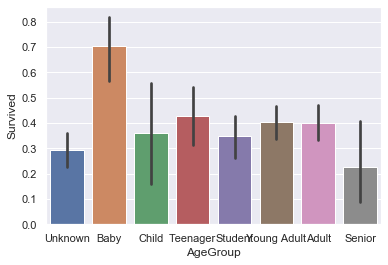

In [9]:
df["Age"] = df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)
sns.barplot(x="AgeGroup", y="Survived", data=df)

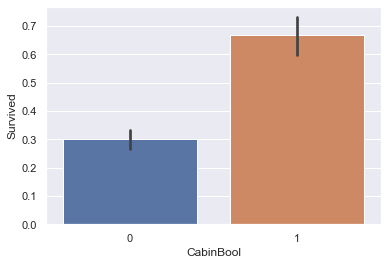

In [10]:
df["CabinBool"] = (df["Cabin"].notnull().astype('int'))
sns.barplot(x="CabinBool", y="Survived", data=df)

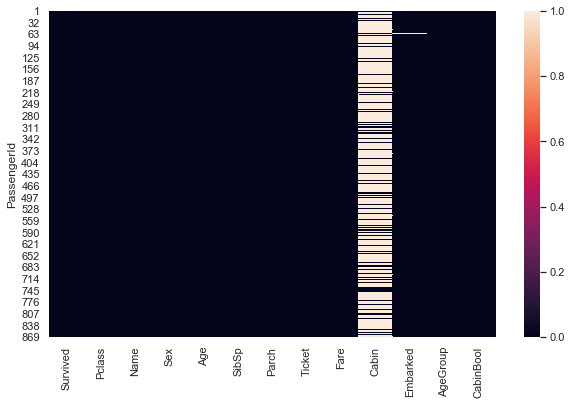

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [13]:
df.isnull().mean().sort_values(ascending=False)

Cabin        0.771044
Embarked     0.002245
CabinBool    0.000000
AgeGroup     0.000000
Fare         0.000000
Ticket       0.000000
Parch        0.000000
SibSp        0.000000
Age          0.000000
Sex          0.000000
Name         0.000000
Pclass       0.000000
Survived     0.000000
dtype: float64

In [14]:
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df.isnull().mean().sort_values(ascending=False)

CabinBool    0.0
AgeGroup     0.0
Embarked     0.0
Fare         0.0
Parch        0.0
SibSp        0.0
Sex          0.0
Pclass       0.0
Survived     0.0
dtype: float64

In [16]:
lbl = LabelEncoder()
df['AgeGroup'] = lbl.fit_transform(df['AgeGroup'])

In [17]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
PassengerId,,,,,,,,,
1,0,3,male,1,0,7.2500,S,4,0
2,1,1,female,1,0,71.2833,C,0,1
3,1,3,female,0,0,7.9250,S,7,0
4,1,1,female,1,0,53.1000,S,7,1
5,0,3,male,0,0,8.0500,S,7,0


In [18]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df)

In [19]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,AgeGroup,CabinBool,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,0,1,0,7.2500,4,0,0,0,1
2,1,1,1,1,0,71.2833,0,1,1,0,0
3,1,3,1,0,0,7.9250,7,0,0,0,1
4,1,1,1,1,0,53.1000,7,1,0,0,1
5,0,3,0,0,0,8.0500,7,0,0,0,1


In [20]:
df.reset_index(drop=True)

features = df.drop(['Survived'], axis = 1)
target = df['Survived']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=365)

## LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

In [23]:
reg.fit(x_train, y_train)

c:\users\abderrahim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
reg.score(x_train, y_train)

0.797752808988764

In [25]:
predicts = reg.predict(x_test)

In [26]:
mse(y_test, predicts)**2

0.03607877407072189

## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
predicts = gaussian.predict(x_test)
mse(y_test, predicts)**2
#round(accuracy_score(predicts, y_test) * 100, 2)

0.05246403046097188

In [28]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
predicts = svc.predict(x_test)
mse(y_test, predicts)**2
#round(accuracy_score(predicts, y_test) * 100, 2)

c:\users\abderrahim\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.05770731250585188

## LinearSVC

In [29]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
predicts = linear_svc.predict(x_test)
mse(y_test, predicts)**2
#round(accuracy_score(predicts, y_test) * 100, 2)

c:\users\abderrahim\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.04506725757623045

## Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
predicts = gbk.predict(x_test)
mse(y_test, predicts)**2
#round(accuracy_score(predicts, y_test) * 100, 2)

0.03398770325520427